## 1. Import Basic Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset into a dataframe
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2. EDA

Since the data is already preprocessed and there are no missing values, we'll go straight to EDA.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.shape

(1372, 5)

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### 2.1 Independent Features

c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 0, 'entropy')

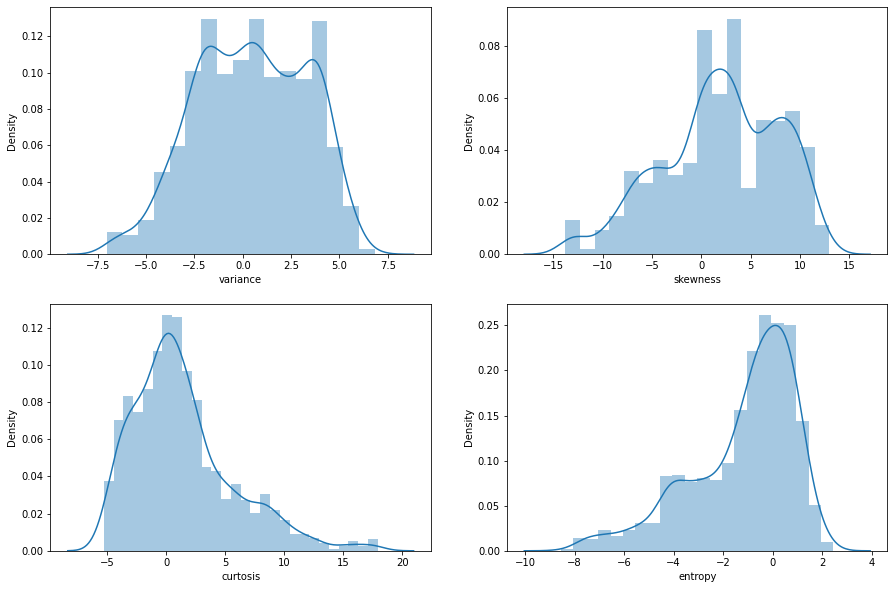

In [7]:
#So our independent features are all numerical, let's to see their distribution
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['variance'])
plt.xlabel('variance')
plt.subplot(2,2,2)
sns.distplot(df['skewness'])
plt.xlabel('skewness')
plt.subplot(2,2,3)
sns.distplot(df['curtosis'])
plt.xlabel('curtosis')
plt.subplot(2,2,4)
sns.distplot(df['entropy'])
plt.xlabel('entropy')

**Observations**: The features do not follow gaussian distribution. Some of them are skewed to the left or right.

### 2.2 Target Variable

Text(0, 0.5, 'class')

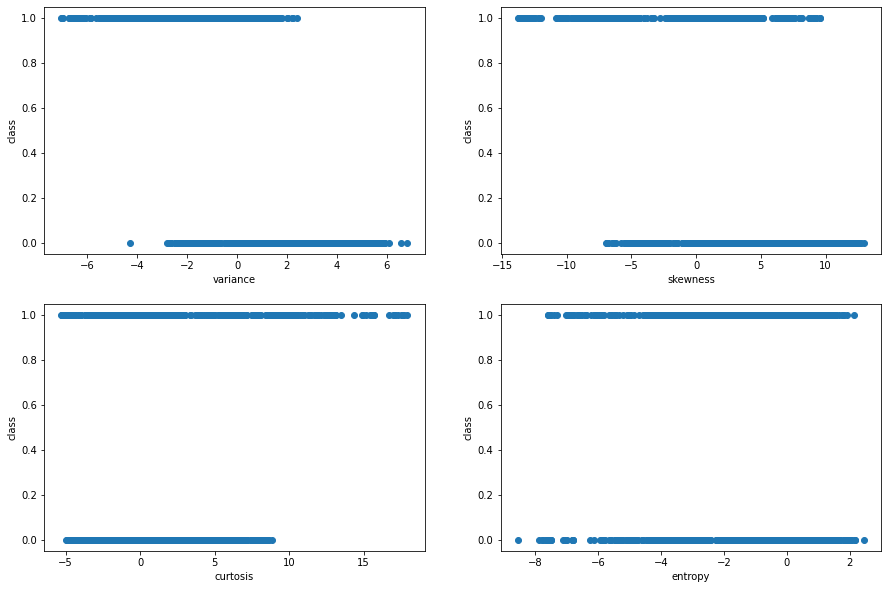

In [8]:
#Now let's look at scatterplots with respect to the target variable.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(df['variance'],df['class'])
plt.xlabel('variance')
plt.ylabel('class')
plt.subplot(2,2,2)
plt.scatter(df['skewness'],df['class'])
plt.xlabel('skewness')
plt.ylabel('class')
plt.subplot(2,2,3)
plt.scatter(df['curtosis'],df['class'])
plt.xlabel('curtosis')
plt.ylabel('class')
plt.subplot(2,2,4)
plt.scatter(df['entropy'],df['class'])
plt.xlabel('entropy')
plt.ylabel('class')

**Observations**: The datapoints overlap in case of all the features. It is difficult to say which features have more influence on the authenticity of bank note.

<AxesSubplot:>

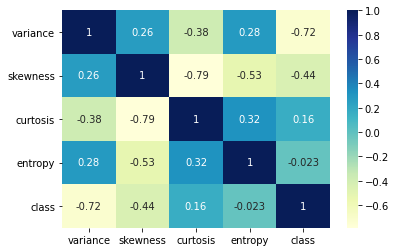

In [9]:
#Let's see the correlation among the features using a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

The correlation seems to be balanced among the features. We might use all of them to train the model.

In [10]:
#Now let's visualize our targe variable 'class' using boxplots
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='entropy'>

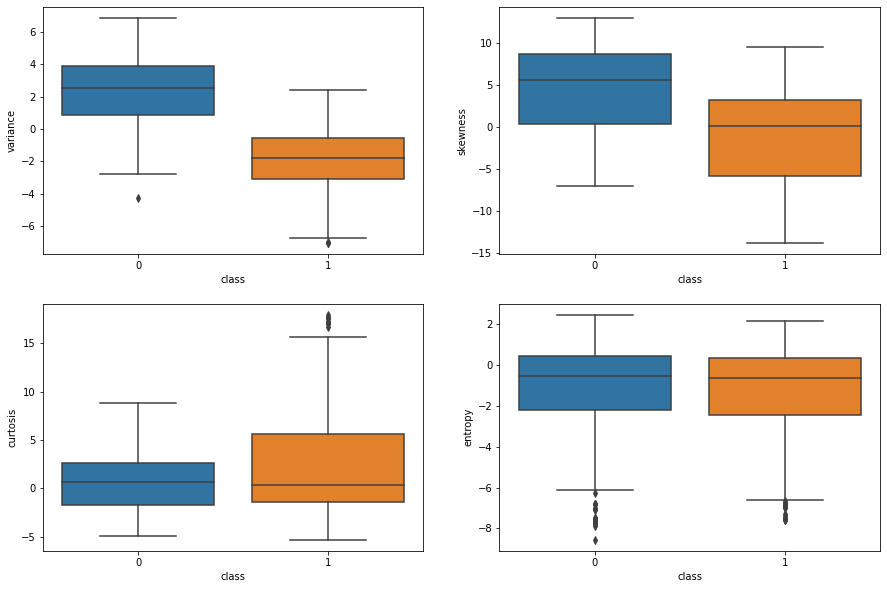

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='variance',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='skewness',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='curtosis',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='entropy',data=df)

**Observations**
* On average fake notes seem to have higher variance (>2)
* On average fake notes seem to have higher skewness (>5)
* curtosis is about the same for both fake and authentic notes
* Entropy is almost equal in both fake and authentic notes except for a few outliers

### 2.3 Univariate and Multivariate Analysis

In [12]:
df_fake = df.loc[df['class']==0]
df_authentic = df.loc[df['class']==1]

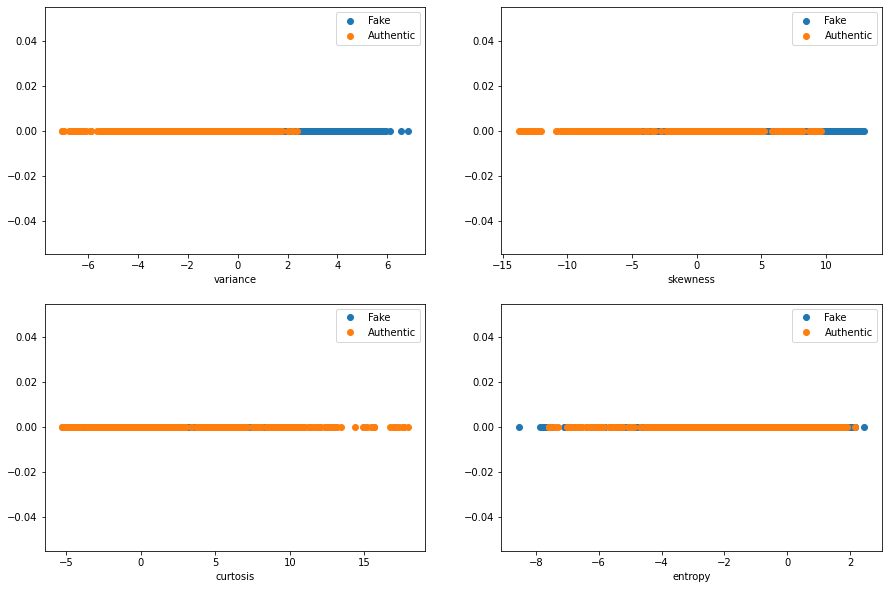

In [13]:
#We are setting the scale to zero for univariate analysis
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(df_fake['variance'],np.zeros_like(df_fake['variance']),'o')
plt.plot(df_authentic['variance'],np.zeros_like(df_authentic['variance']),'o')
plt.xlabel('variance')
plt.legend(['Fake','Authentic'])
plt.subplot(2,2,2)
plt.plot(df_fake['skewness'],np.zeros_like(df_fake['skewness']),'o')
plt.plot(df_authentic['skewness'],np.zeros_like(df_authentic['skewness']),'o')
plt.xlabel('skewness')
plt.legend(['Fake','Authentic'])
plt.subplot(2,2,3)
plt.plot(df_fake['curtosis'],np.zeros_like(df_fake['curtosis']),'o')
plt.plot(df_authentic['curtosis'],np.zeros_like(df_authentic['curtosis']),'o')
plt.xlabel('curtosis')
plt.legend(['Fake','Authentic'])
plt.subplot(2,2,4)
plt.plot(df_fake['entropy'],np.zeros_like(df_fake['entropy']),'o')
plt.plot(df_authentic['entropy'],np.zeros_like(df_authentic['entropy']),'o')
plt.xlabel('entropy')
plt.legend(['Fake','Authentic'])

c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mahe\anaconda3\envs\banknote\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.war

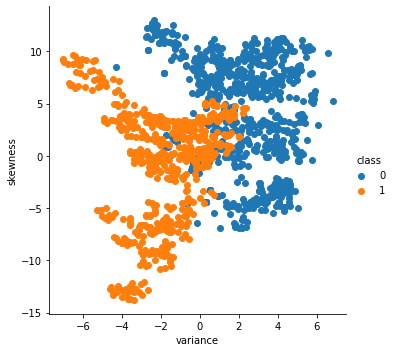

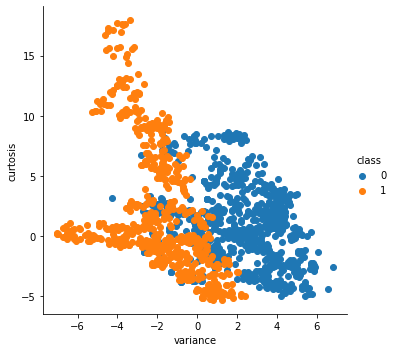

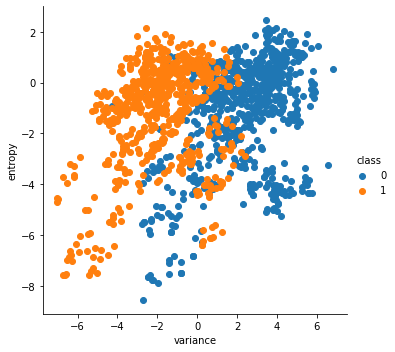

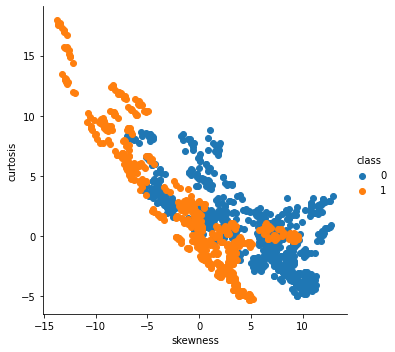

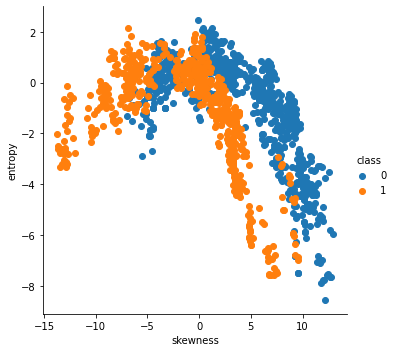

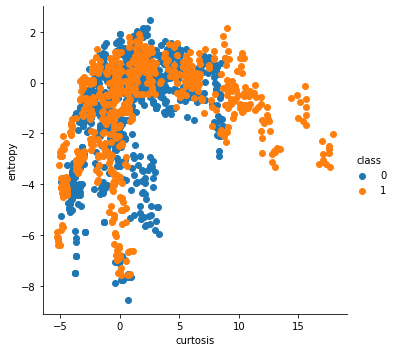

In [14]:
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'variance','skewness').add_legend()
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'variance','curtosis').add_legend()
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'variance','entropy').add_legend()
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'skewness','curtosis').add_legend()
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'skewness','entropy').add_legend()
sns.FacetGrid(df,hue='class',size=5).map(plt.scatter,'curtosis','entropy').add_legend()

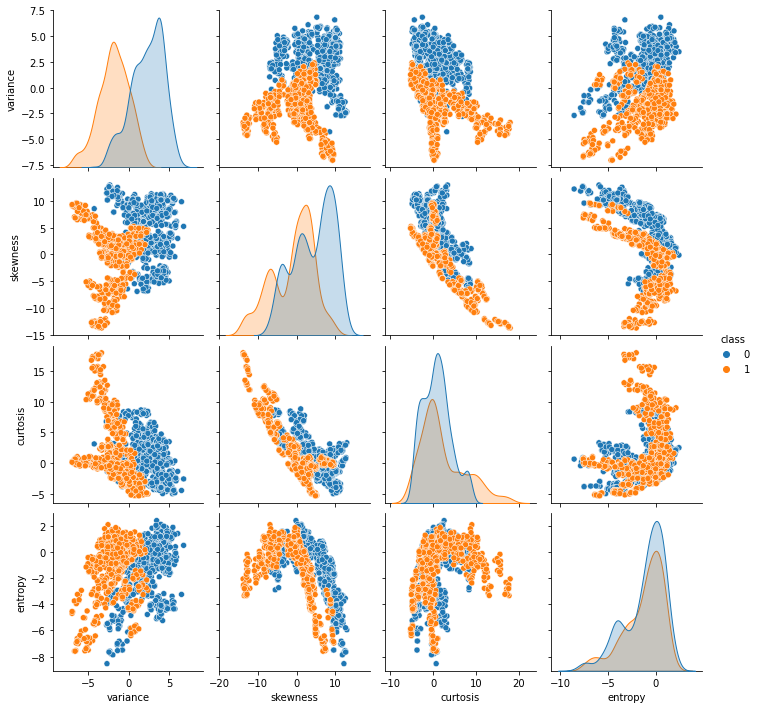

In [15]:
#Multiavriate analysis
sns.pairplot(df,hue='class')

**Observations:** The features are unable to classify the notes as fake or authentic on their own as the datapoints overlap. This indicates we will have to use all of them to train our model.

## 3. Model Building

Feature Scaling can be implemented since some of the ML algorithms function on Euclidian Distance such as KNN. Since this dataset is rather simple, I have not scaled them.

In [16]:
#Seperate the dependent and independent variables
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [17]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [19]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


### 3.1 Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
accuracies= cross_val_score(logreg,X_train,y_train,cv=10,scoring='accuracy')
print(accuracies)

[0.98958333 0.97916667 0.96875    0.98958333 0.97916667 1.
 1.         1.         1.         1.        ]


In [21]:
print('Logistic Regression has a mean training accuracy of:',np.mean(accuracies)*100)

Logistic Regression has a mean training accuracy of: 99.0625


In [22]:
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression has a test accuracy of:',accuracy_score(y_test,y_pred_logreg)*100)

Logistic Regression has a test accuracy of: 98.7864077669903


### 3.2 K-Nearest Neighbors (KNN)

In [23]:
#For k=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn1 = knn.predict(X_test)
print('KNN with k=1 has an accuracy of:',accuracy_score(y_test,y_pred_knn1)*100)

KNN with k=1 has an accuracy of: 99.75728155339806


In [24]:
#For k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn3 = knn.predict(X_test)
print('KNN with k=3 has an accuracy of:',accuracy_score(y_test,y_pred_knn3)*100)

KNN with k=3 has an accuracy of: 99.75728155339806


In [25]:
#For k=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn5 = knn.predict(X_test)
print('KNN with k=1 has an accuracy of:',accuracy_score(y_test,y_pred_knn5)*100)

KNN with k=1 has an accuracy of: 100.0


Text(0, 0.5, 'Accuracy Score')

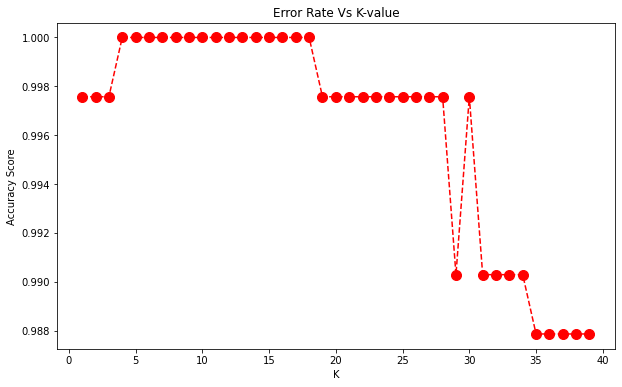

In [26]:
#Let's try to find the best k-value
acc_score = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc_score.append(np.mean(accuracy_score(y_test,pred_i)))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_score,color='red',linestyle='dashed',marker='o',markersize=10)
plt.title('Error Rate Vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

K-values between 5-19 give the highest accuracy

### 3.3 Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
accuracies = cross_val_score(svc,X_train,y_train,cv=10,scoring='accuracy')
print(accuracies)

[1.         0.98958333 1.         1.         1.         0.96875
 1.         1.         1.         1.        ]


In [28]:
print('SVM has a mean training accuracy of:',np.mean(accuracies)*100)

SVM has a mean training accuracy of: 99.58333333333333


In [29]:
y_pred_svm = svc.predict(X_test)
print('SVM has a test accuracy of:',accuracy_score(y_test,y_pred_svm)*100)

SVM has a test accuracy of: 99.75728155339806


### 3.4 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
accuracies = cross_val_score(DTC,X_train,y_train,cv=10,scoring='accuracy')
print(accuracies)

[0.98958333 0.94791667 1.         1.         0.98958333 0.98958333
 1.         1.         0.94791667 0.96875   ]


In [31]:
print('Decision Tree has a mean training accuracy of:',np.mean(accuracies)*100)

Decision Tree has a mean training accuracy of: 98.33333333333334


In [32]:
y_pred_dtc = DTC.predict(X_test)
print('Decision Tree has a test accuracy of:',accuracy_score(y_test,y_pred_dtc)*100)

Decision Tree has a test accuracy of: 97.81553398058253


All the algorithms perform very well. We will use SVM for model deployment!

## 4. Pickle File

In [33]:
#Write to disk to use it any number of times
import pickle 
file = open('banknote.pkl','wb')
pickle.dump(svc,file)
file.close()

In [34]:
loaded_model = pickle.load(open('banknote.pkl','rb'))
final_pred = loaded_model.predict(X_test)
print('Our Final model has an accuracy of:',accuracy_score(y_test,final_pred)*100)

Our Final model has an accuracy of: 99.75728155339806


In [37]:
pred = loaded_model.predict([[0.32924,-4.4552,4.5718,-0.98880]])
if pred[0]==0:
    print('This is a  Fake BankNote!')
else:
    print('This is an Authentic BankNote!')

This is a  Fake BankNote!


In [38]:
pred = loaded_model.predict([[-0.4294,-0.14693,0.044265,-0.15605]])
if pred[0]==0:
    print('This is a  Fake BankNote!')
else:
    print('This is an Authentic BankNote!')

This is an Authentic BankNote!
